<a href="https://colab.research.google.com/github/nour-said/car/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/car_data.csv')
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


In [ ]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [ ]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
df['Purchased'].unique()

array([0, 1])

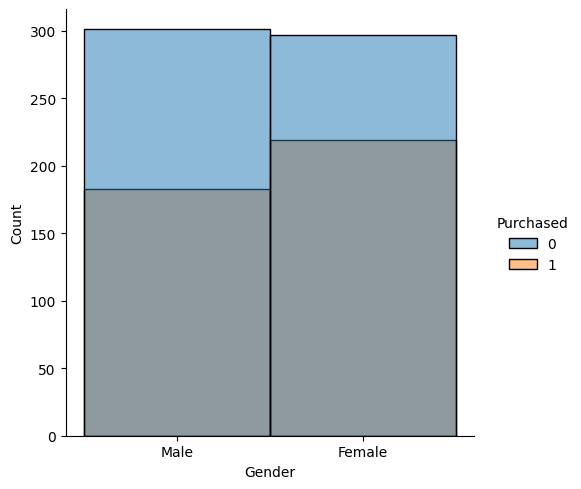

In [ ]:
sns.displot(x='Gender', data=df, hue='Purchased')

In [ ]:
df['Gender'] = df['Gender'].replace({'Male' :1,'Female' :0})
df=df.drop(columns =['User ID'])
df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Purchased'])
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 15)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = dtr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
accuracy*100

# score = dtr.score(y_test, y_pred)

93.0

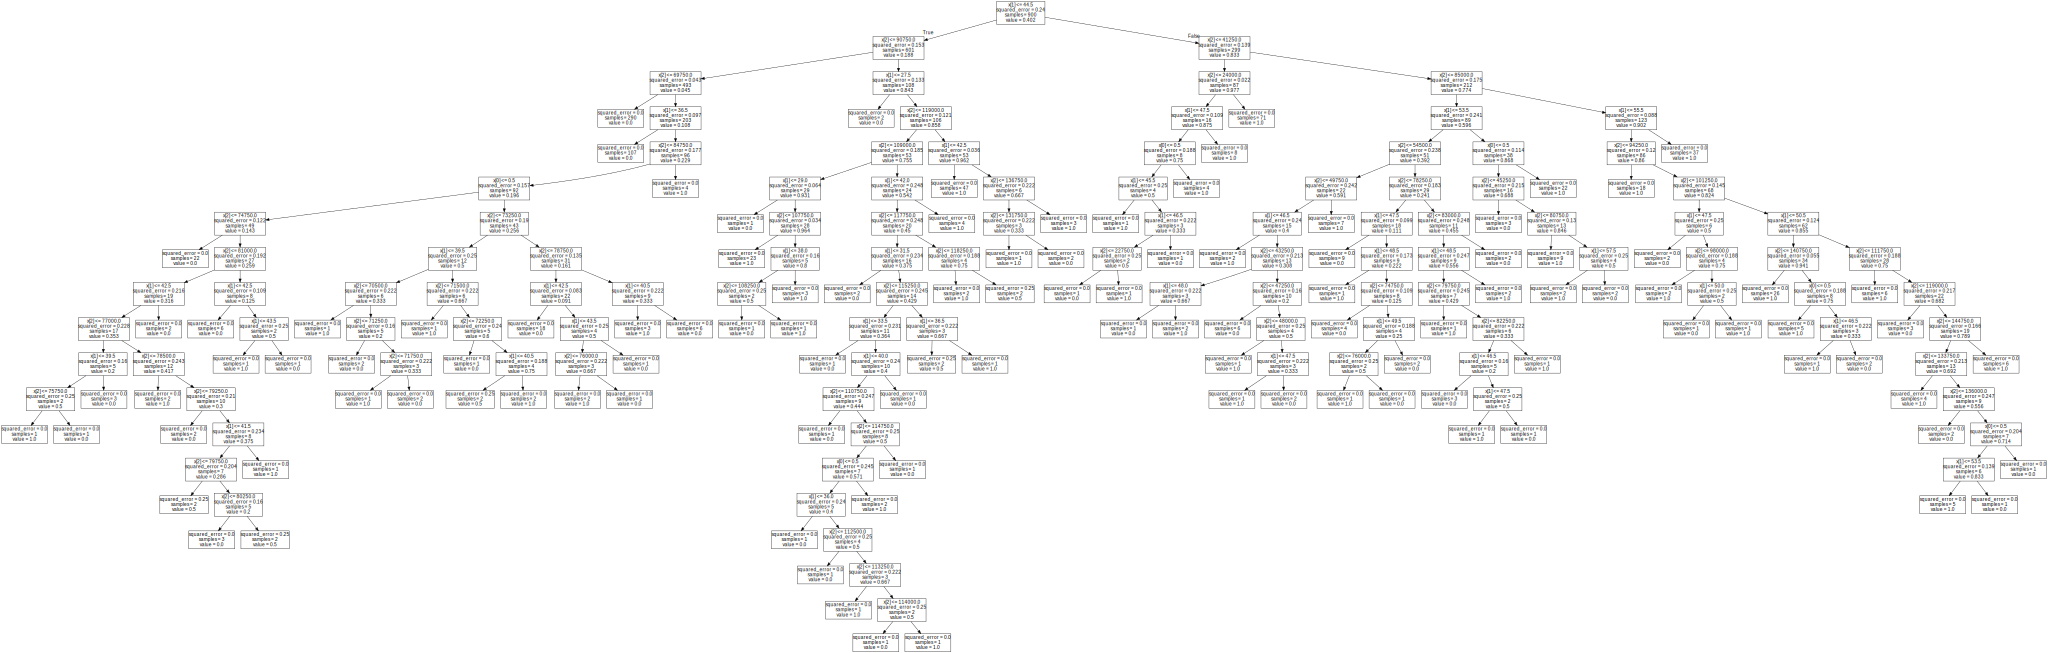

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

data = export_graphviz(dtr, out_file=None)
graph = graphviz.Source(data)
graph